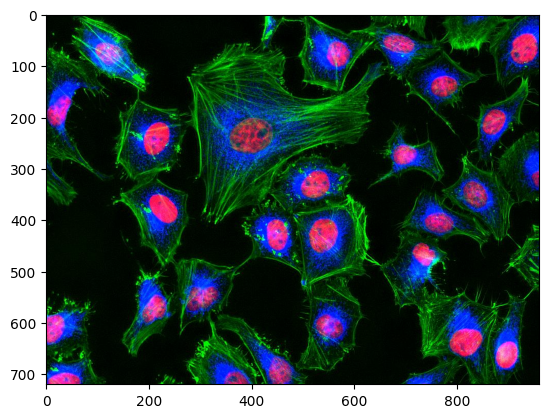

In [116]:
#Importamos las librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Cargamos la imagen
img = cv2.imread(r"celula.jpg", cv2.IMREAD_COLOR)
plt.imshow(img)

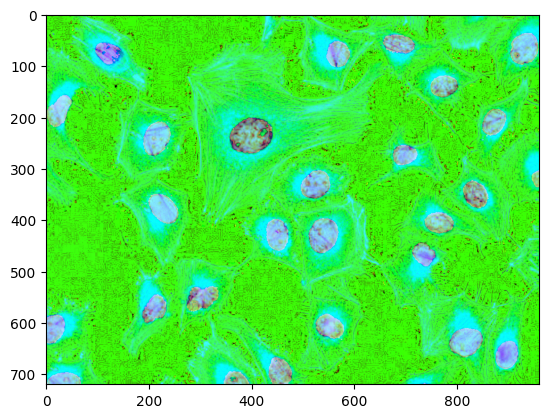

In [117]:
#Convertimos la imagen a escala HSV, pues el color es una caracteristica fundamental para el conteo
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

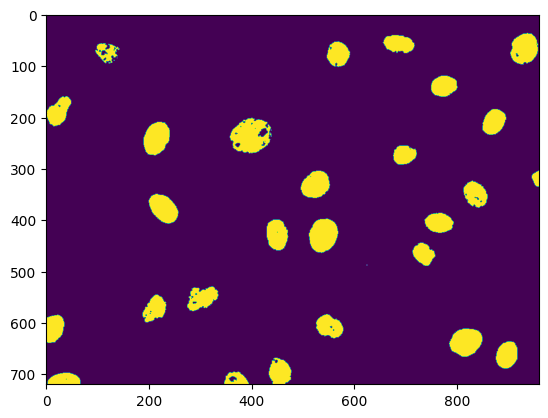

In [137]:
#Limitamos las areas para que solo capture la parte rosada
lower = np.array([90, 45, 50])
upper = np.array([172, 255, 255])
filtro = cv2.inRange(hsv, lower, upper)
plt.imshow(filtro)
plt.show()

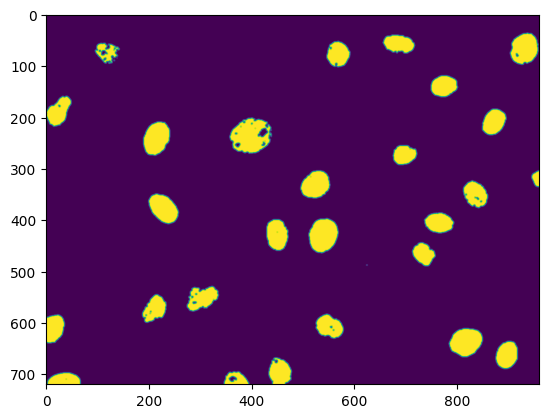

In [138]:
#Suavizamos la imagen para mejorar la detección de los bordes
suavizada = cv2.GaussianBlur(filtro, (5, 5), 0)
plt.imshow(suavizada)
plt.show()

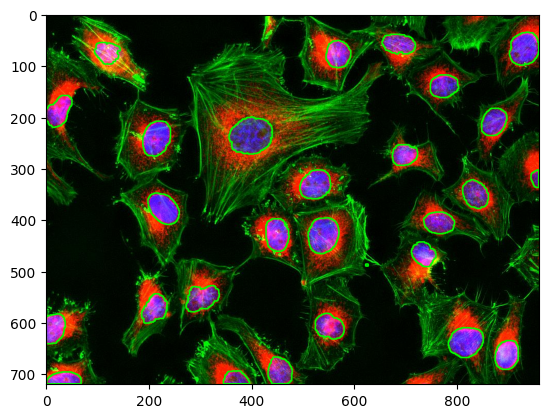

En la imagen hay 28 celulas


In [146]:
#Creacion de contornos
contornos, _ = cv2.findContours(suavizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contador = len(contornos)
dibujo_contorno = cv2.drawContours(img.copy(), contornos, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(dibujo_contorno, cv2.COLOR_BGR2RGB))
plt.show()
print(f'En la imagen hay {contador} celulas')


In [6]:
#####################
#Segundo punto
import os
import pydicom
import matplotlib.pyplot as plt


def cargar(carpeta):
    imagenes = []
    for filename in sorted(os.listdir(carpeta)):
        #itera sobre los nombres de archivo en una carpeta específica, en orden alfabético, uno por uno, asignando cada nombre de archivo a la variable filename en cada iteración del bucle
        if filename.endswith('.dcm'):
            path = os.path.join(carpeta, filename)
            imagen = pydicom.dcmread(path)
            imagenes.append(imagen)
    return imagenes

#path a carpeta que contiene las imágenes DICOM
carpeta = "C:\Users\sofia\OneDrive\Escritorio\Info 2024\Info-2\Info-2\Unidad 3\archivosDCM"
images = cargar(carpeta)

def viewImages(imagenes):
    for i, imagen in enumerate(imagenes, start=1):

        plt.imshow(imagen.pixel_array, cmap=plt.cm.gray)
        plt.title(f"Imagen {i}")
        plt.axis('off')
        plt.show()
        input("Presiona Enter para ver la siguiente imagen...")
        

# Visualizar las imágenes DICOM en un bucle
viewImages(images)
print("Saliendo..")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1813162529.py, line 19)